# Chocolate Scraping with Beautiful Soup

After eating chocolate bars your whole life, you've decided to go on a quest to find the greatest chocolate bar in the world.

You've found a website that has over 1700 reviews of chocolate bars from all around the world. It's linked below the text for the first task.

The data is displayed in a table, instead of in a `csv` or `json`. Thankfully, we have the power of BeautifulSoup that will help us transform this webpage into a DataFrame that we can manipulate and analyze.

The rating scale is from 1-5, as described in <a href="http://flavorsofcacao.com/review_guide.html">this review guide</a>. A `1` is "unpleasant" chocolate, while a `5` is a bar that transcends "beyond the ordinary limits".

Some questions we thought about when we found this dataset were:
 - Where are the best cocao beans grown?
 - Which countries produce the highest-rated bars?
 - What's the relationship between cocao solids percentage and rating?
 
Can we find a way to answer these questions, or uncover more questions, using BeautifulSoup and Pandas?

## Make Some Chocolate Soup

1. Explore the webpage displayed in the browser. What elements could be useful to scrape here? Which elements do we _not_ want to scrape?

https://content.codecademy.com/courses/beautifulsoup/cacao/index.html

List of Tags to Include:

tr and td

List of Tags to Exclude:

img and h1

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

2. Let's make a request to this stie to get the raw HTML, which we can later turn into a BeautifulSoup object.

   The URL is

```
https://content.codecademy.com/courses/beautifulsoup/cacao/index.html
```
   
   You can pass this into the `.get()` method of the `requests` module to get the HTML.

In [2]:
#Make a request to the site and get the HTML
webpage = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')

3. Create a BeautifulSoup object called `soup` to traverse this HTML.

   Use `"html.parser"` as the parser, and the content of the response you got from your request as the document.

In [3]:
#Turn into Beautiful Soup object
soup = BeautifulSoup(webpage.content, "html.parser")

4. If you want, print out the `soup` object to explore the HTML.

   So many table rows! You're probably very relieved that we don't have to scrape this information by hand.

In [4]:
# Print only lines 50-100 of the HTML
soup_str = str(soup)
lines = soup_str.splitlines()
for line in lines[50:100]:
    print(line)

            </td>
<td class="Origin">Specific Bean Origin
               or Bar Name
            </td>
<td class="REF">REF</td>
<td class="ReviewDate">Review
               Date
            </td>
<td class="CocoaPercent">Cocoa
               Percent
            </td>
<td class="CompanyLocation">Company
               Location
            </td>
<td class="Rating">Rating</td>
<td class="BeanType">Bean
               Type
            </td>
<td class="BroadBeanOrigin">Broad Bean
               Origin
            </td>
</tr>
<tr>
<td class="Company">A. Morin</td>
<td class="Origin">Agua Grande</td>
<td class="REF">1876</td>
<td class="ReviewDate">2016</td>
<td class="CocoaPercent">63%</td>
<td class="CompanyLocation">France</td>
<td class="Rating">3.75</td>
<td class="BeanType"> </td>
<td class="BroadBeanOrigin">Sao Tome</td>
</tr>
<tr>
<td class="Company">A. Morin</td>
<td class="Origin">Kpime</td>
<td class="REF">1676</td>
<td class="ReviewDate">2015</td>
<td class="CocoaPercent">70%</td>

## How are ratings distributed?

5. How many terrible chocolate bars are out there? And how many earned a perfect 5? Let's make a histogram of this data.

   The first thing to do is to put all of the ratings into a list.
   
   Use a command on the `soup` object to get all of the tags that contain the ratings.

In [5]:
#Get all the tags that contain the ratings
ratings_class = soup.find_all(attrs={"class":"Rating"})

6. Create an empty list called `ratings` to store all the ratings in.

In [6]:
ratings = []

7. Loop through the ratings tags and get the text contained in each one. Add it to the ratings list.

   As you do this, convert the rating to a float, so that the ratings list will be numerical. This should help with calculations later.

In [7]:
#Get the text from the rating tags and convert it into a float. Add to the ratings list.
for tag in ratings_class[1:]:
  # Get the text and remove whitespace
  text = tag.get_text()
  try:
        rating = float(text)       # Convert to float
        ratings.append(rating)     # Add to the list
  except ValueError:
        # In case there's a non-numeric value (like header text)
        continue
#print first 10 ratings
print(ratings[:10])

[3.75, 2.75, 3.0, 3.5, 3.5, 2.75, 3.5, 3.5, 3.75, 4.0]


8. Using Matplotlib, create a histogram of the ratings values:

```py
plt.hist(ratings)
```

   Remember to show the plot using `plt.show()`!

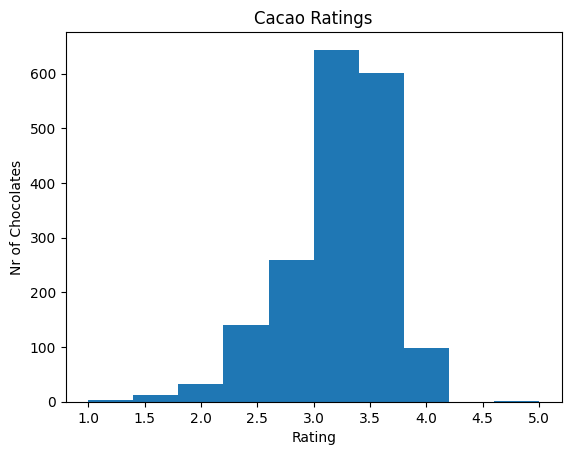

In [8]:
#Plot histogram
plt.hist(ratings)
plt.title('Cacao Ratings')
plt.xlabel('Rating')
plt.ylabel('Nr of Chocolates')
plt.show()

## Which chocolatier makes the best chocolate?

9. We want to now find the 10 most highly rated chocolatiers. One way to do this is to make a DataFrame that has the chocolate companies in one column, and the ratings in another. Then, we can do a `groupby` to find the ones with the highest average rating.

   First, let's find all tags on the webpage that contain the company names.

In [9]:
#Find all tags that contain company names
company_name_class = soup.select(".Company")

10. Just like we did with ratings, we now want to make an empty list to hold company names.

In [10]:
company_names = []

11. Loop through the tags containing the company names, and add the text from each tag to the list you just created.

In [11]:
#Get the text from the Company tags and add to the list.
for tag in company_name_class[1:]:
  text = tag.get_text()
  company_names.append(text)

print(company_names[:10])
print(f"Company names: {len(company_names)}")
print(f"Ratings: {len(ratings)}")

['A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin']
Company names: 1795
Ratings: 1795


12. Create a DataFrame with a column "Company" corresponding to your companies list, and a column "Ratings" corresponding to your ratings list.

In [12]:
#Create a DataFrame with a column "Company" and "Ratings"
dict = {"Company": company_names,
"Rating": ratings}
df = pd.DataFrame.from_dict(dict)
print(df.head())

    Company  Rating
0  A. Morin    3.75
1  A. Morin    2.75
2  A. Morin    3.00
3  A. Morin    3.50
4  A. Morin    3.50


13. Use `.grouby` to group your DataFrame by Company and take the average of the grouped ratings.

    Then, use the `.nlargest` command to get the 10 highest rated chocolate companies. Print them out.
    
    Look at the hint if you get stuck on this step!

In [13]:
#Calculate average rating for each company
average_rating = df.groupby("Company").Rating.mean()

#Get 10 highest rated chocolate companies
top_10 = average_rating.nlargest(10)
print(top_10)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64


## Is more cacao better?

14. We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacoa to be better than those with lower levels of cacoa.

    It looks like the cocoa percentages are in the table under the Cocoa Percent column (note we are looking at cocoa not cocao!)
    
    Using the same methods you used in the last couple of tasks, create a list that contains all of the cocoa percentages. Store each percent as a float, after stripping off the `%` character.

In [14]:
#Get all the tags that contain the Cocoa Percent
Cocoa_class = soup.select(".CocoaPercent")

#Get the text from the Cocoa Percent tags and add to the list.
cocoa_percent = []
for tag in Cocoa_class[1:]:
  text = tag.get_text().strip("%")
  try:
        percent = float(text)       # Convert to float
        cocoa_percent.append(percent)     # Add to the list
  except ValueError:
        # In case there's a non-numeric value
        continue
print(cocoa_percent[:10])

[63.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0]


15. Add the cocoa percentages as a column called `"CocoaPercentage"` in the DataFrame that has companies and ratings in it.

In [15]:
df["CocoaPercentage"] = cocoa_percent
print(df.head())

    Company  Rating  CocoaPercentage
0  A. Morin    3.75             63.0
1  A. Morin    2.75             70.0
2  A. Morin    3.00             70.0
3  A. Morin    3.50             70.0
4  A. Morin    3.50             70.0


16. Make a scatterplot of ratings (`your_df.Rating`) vs percentage of cocoa (`your_df.CocoaPercentage`).

    You can do this in Matplotlib with these commands:
    
```py
plt.scatter(df.CocoaPercentage, df.Rating)
plt.show()
```

Call `plt.clf()` to clear the figure between showing your histogram and this scatterplot.

In [16]:
plt.clf()

<Figure size 640x480 with 0 Axes>

17. Is there any correlation here? We can use some numpy commands to draw a line of best-fit over the scatterplot.

    Copy this code and paste it after you create the scatterplot, but before you call `.show()`:
    
```py
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r-")
```

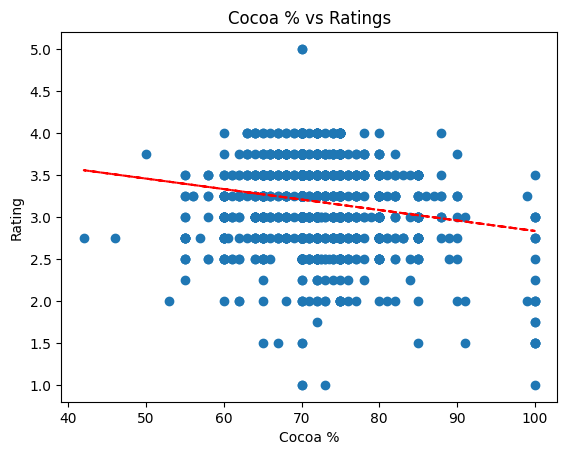

In [17]:
#Plot Cocoa % vs Ratings
plt.scatter(df.CocoaPercentage, df.Rating)
plt.title("Cocoa % vs Ratings")
plt.xlabel("Cocoa %")
plt.ylabel("Rating")

#Draw a line of best fit with NumPy
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r--")
plt.show()

## Explore!

18. We have explored a couple of the questions about chocolate that inspired us when we looked at this chocolate table.

    What other kinds of questions can you answer here? Try to use a combination of BeautifulSoup and Pandas to explore some more.
    
    For inspiration: Where are the best cocoa beans grown? Which countries produce the highest-rated bars?

In [18]:
#extract Cocoa bean Origins data
origins = []
origin_tags = soup.select(".BroadBeanOrigin")

for td in origin_tags[1:]:
    country = td.get_text()
    origins.append(country)

#Create the Dataframe comparing with Cocoa percentages
beans = {"Bean Origin": origins, "CocoaPercentage": cocoa_percent}
beans_df = pd.DataFrame.from_dict(beans)

#Calculate average percentage by Origin
mean_percent = beans_df.groupby("Bean Origin").CocoaPercentage.mean()
ten_best = mean_percent.nlargest(10)
print(ten_best)

Bean Origin
Peru, Ecuador                   99.000000
Guat., D.R., Peru, Mad., PNG    88.000000
Samoa                           85.000000
Venezuela/ Ghana                85.000000
Sao Tome & Principe             79.357143
Central and S. America          78.000000
Principe                        77.000000
Carribean                       76.250000
El Salvador                     75.000000
Gabon                           75.000000
Name: CocoaPercentage, dtype: float64
